In [0]:
!git clone https://gitlab.tubit.tu-berlin.de/ywkim09/GAN_pjt_images


fatal: destination path 'GAN_pjt_images' already exists and is not an empty directory.


In [0]:
pip install python-resize-image

     |████████████████████████████████| 2.1MB 5.0MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from resizeimage import resizeimage
import numpy as np


#set paths
pathTrainMalignant='/content/GAN_pjt_images/train/malignant/dataset/'   
pathTrainBening='/content/GAN_pjt_images/train/benign/dataset/' 
pathTestMal='/content/GAN_pjt_images/test/malignant/dataset/'   
pathTestBenign='/content/GAN_pjt_images/test/benign/dataset/'    

root_path = '/content/'
filMixMalin ='malign1' #features list from GAN data
fileMixBenign='benign1' #features list from GAN data


In [0]:
import os  
  
 ###for training malignant
folder = os.fsencode(pathTrainMalignant)
print(folder)
features= []
list1=os.listdir(pathTrainMalignant)

training=[]

for i,file in enumerate(list1) :
    # load the image
    img = Image.open(pathTrainMalignant+file)    
    # resize image and ignore original aspect ratio
    img_resized = img.resize((32,32))
    imgarr = np.array(img_resized)
    a=imgarr.flatten()
    #print(a.shape)
    training.append(a)


###for training bening
folder = os.fsencode(pathTrainBening)
print(folder)
features= []
list1=os.listdir(pathTrainBening)

training_b=[]

for i,file in enumerate(list1) :
    # load the image
    img = Image.open(pathTrainBening+file)    
    # resize image and ignore original aspect ratio
    img_resized = img.resize((32,32))
    imgarr = np.array(img_resized)
    a=imgarr.flatten()
    #print(a.shape)
    training_b.append(a)

b'/content/GAN_pjt_images/train/malignant/dataset/'
b'/content/GAN_pjt_images/train/benign/dataset/'


In [0]:

###for test malignant
folder = os.fsencode(pathTestMal)
print(folder)
features= []
list1=os.listdir(pathTestMal)

test_m=[]

for i,file in enumerate(list1) :
    # load the image
    img = Image.open(pathTestMal+file)    
    # resize image and ignore original aspect ratio
    img_resized = img.resize((32,32))
    imgarr = np.array(img_resized)
    a=imgarr.flatten()
    #print(a.shape)
    test_m.append(a)
    
    
    
###for test bening
folder = os.fsencode(pathTestBenign)
print(folder)
features= []
list1=os.listdir(pathTestBenign)

test_b=[]

for i,file in enumerate(list1) :
    # load the image
    img = Image.open(pathTestBenign+file)    
    # resize image and ignore original aspect ratio
    img_resized = img.resize((32,32))
    imgarr = np.array(img_resized)
    a=imgarr.flatten()
    #print(a.shape)
    test_b.append(a)    
    

b'/content/GAN_pjt_images/test/malignant/dataset/'
b'/content/GAN_pjt_images/test/benign/dataset/'


In [0]:
import numpy as np

train=np.vstack((training,training_b))
y_train=np.concatenate((np.zeros(len(training)) ,np.ones(len(training_b) ) ))
np.save('x_train',train)
np.save('y_train',y_train)

print(train.shape)

Xtest=np.vstack((test_m,test_b))
Ytest=np.concatenate((np.zeros(len(test_m)) ,np.ones(len(test_b) ) ))

print(Xtest.shape)
print(Ytest.shape)
np.save('x_test',Xtest)
np.save('y_test',Ytest)

print(y_train)

test_size={}
test_size['Malign_test']=len(test_m)
test_size['Benign_test']=len(test_b)

train_size={}
train_size['Malign_train']=len(training)
train_size['Benign_train']=len(training_b)


(2637, 3072)
(660, 3072)
(660,)
[0. 0. 0. ... 1. 1. 1.]


In [0]:
#read featuers list file

import pickle


with open( root_path+filMixMalin, "rb") as fp: 
    # Unpickling
    maling_list = pickle.load(fp)
    

with open( root_path+fileMixBenign, "rb") as fp: 
    # Unpickling
    benign_list = pickle.load(fp)
    

In [0]:


malign_flat=[]
benign_flat=[]
for i,file in enumerate(maling_list) :
    
    imgarr = np.array(file)
    a=imgarr.flatten()
    
    malign_flat.append(a)
    

for i,file in enumerate(benign_list) :
  
    imgarr = np.array(file)
    a=imgarr.flatten()
    
    benign_flat.append(a)
    
print(len(malign_flat))
print(len(benign_flat))

gan={}
gan['Maling_GAN']=len(malign_flat)
gan['Benign_GAN']=len(benign_flat)

120
120


In [0]:
training_maling_mix=[]
training_b_mix=[]

training_maling_mix=training+malign_flat
training_b_mix=training_b + benign_flat

print(len(training_maling_mix))
print(len(training_b_mix))

print((training_maling_mix[0].shape))
print((training_b_mix[0].shape))

print(len(training))
print(len(training_b))

1317
1560
(3072,)
(3072,)
1197
1440


In [0]:
m = np.asarray(training_maling_mix)
b = np.asarray(training_b_mix)
print(b.shape)
print(m.shape)
x_train_mix = np.vstack((training_maling_mix+training_b_mix))
print(x_train_mix.shape)

y_train_mix=np.concatenate((np.zeros(len(training_maling_mix)) ,np.ones(len(training_b_mix) ) ))
print(y_train_mix.shape)
np.save('x_train_mix',x_train_mix)
np.save('y_train_mix',y_train_mix)

mix={}
mix['Malign_combined']=len(training_maling_mix)
mix['Benign_combined']=len(training_b_mix)

(1560, 3072)
(1317, 3072)
(2877, 3072)
(2877,)


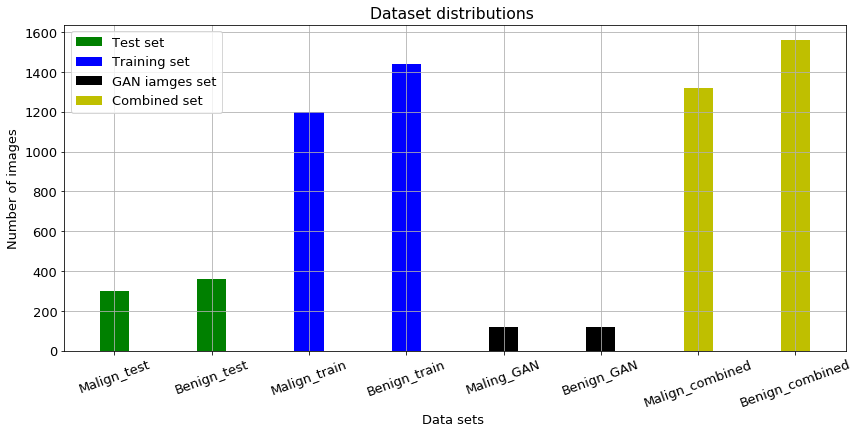

In [0]:
#plot trainin data 
pyplot.rcParams.update({'font.size': 13})
fig, ax = pyplot.subplots()
fig.set_size_inches(14, 6)
t=train_size.keys()
m=mix.keys()

ax.bar(test_size.keys(), test_size.values(),width = 0.3,align='center',color='g',label='Test set' )
ax.bar(t, train_size.values(),width = 0.3,align='center',color='b',label='Training set' )

ax.bar(gan.keys(), gan.values(),width = 0.3,align='center',color='k',label='GAN iamges set' )
ax.bar(m, mix.values(),width = 0.3,align='center',color='y',label='Combined set' )
pyplot.ylabel('Number of images')
pyplot.xlabel('Data sets ')
pyplot.title('Dataset distributions ')
pyplot.legend()
pyplot.xticks(rotation=20)
pyplot.grid(True)
pyplot.show()


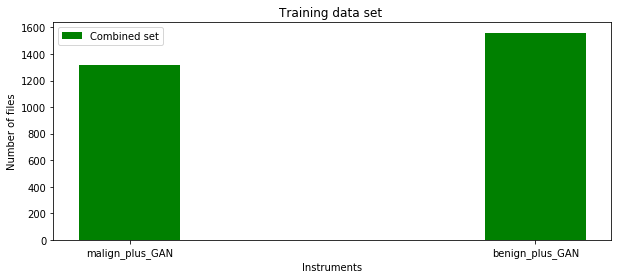

In [0]:
fig, ax = pyplot.subplots()
fig.set_size_inches(10, 4)

pyplot.ylabel('Number of files')
pyplot.xlabel('Instruments')
pyplot.title('Training data set ')
pyplot.legend()
pyplot.show()
